In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#check the dimensions of the training data
train_images.shape

(60000, 28, 28)

In [5]:
#verify the number of train_lables
len(train_labels)

60000

In [6]:
#verify the number of images in test_images by checking the dimensions
test_images.shape

(10000, 28, 28)

In [7]:
#verify the number of images in test_labels
len(test_labels)

10000

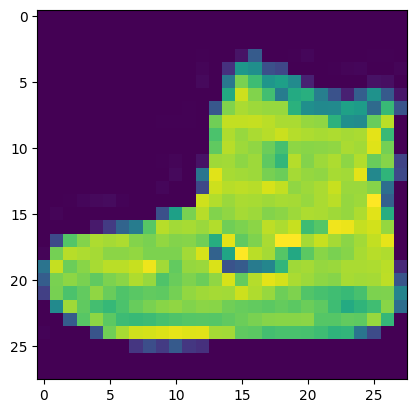

In [8]:
#plot a figure using the imshow() function to view the first image in train_images (train_images[0])
plt.figure()
plt.imshow(train_images[0])

In [9]:
train_images = train_images / 255

test_images = test_images / 255

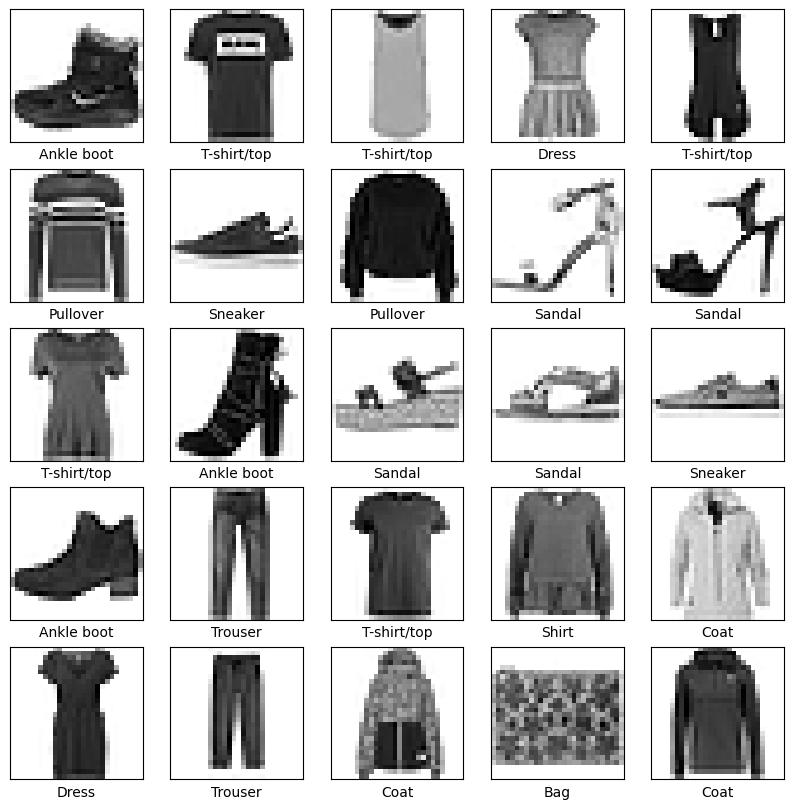

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
#compile the model using model.compile using the adam optimizer, SparseCategoricalCrossentropy loss and accuracy as metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5044 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3423 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8827
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2838 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2611 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2499 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3322 - accuracy: 0.8811 - 403ms/epoch - 1ms/step

Test accuracy: 0.8810999989509583


In [19]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [20]:
#predict on the test_images using the probability_model
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 736us/step


In [21]:
predictions[0]

array([2.9169855e-06, 7.3764511e-08, 1.4019520e-08, 6.2141545e-08,
       4.2245611e-09, 8.5662649e-04, 1.5545294e-05, 1.0212989e-02,
       9.5092118e-06, 9.8890215e-01], dtype=float32)

In [22]:
#use np.argmax to find the highest confidence value
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

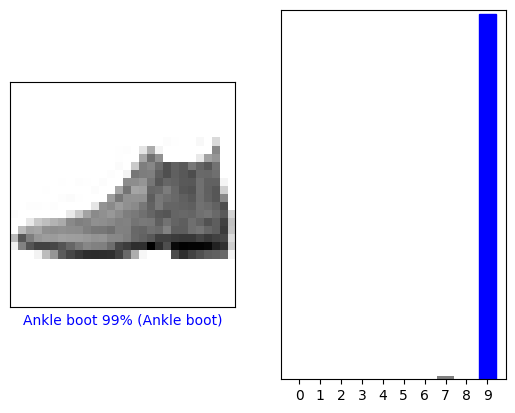

In [24]:
# plot the 0th image and next to that plot a bar graph of the predicted values for that image
# if predicted_label is the same as the actual label of the image then the x_axis label should be in blue, whereas 
# if the predicted_label is not the same as the actual label of the image then the x_axis label should be in red

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="gray")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

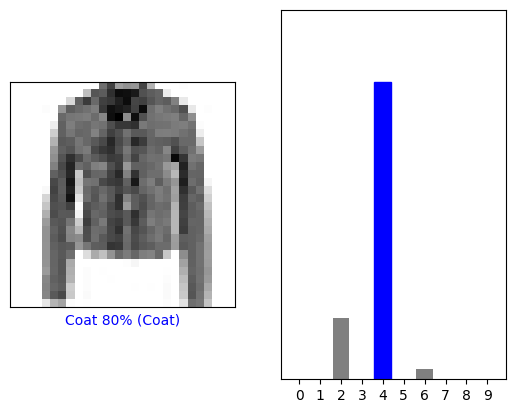

In [25]:
i = 10
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

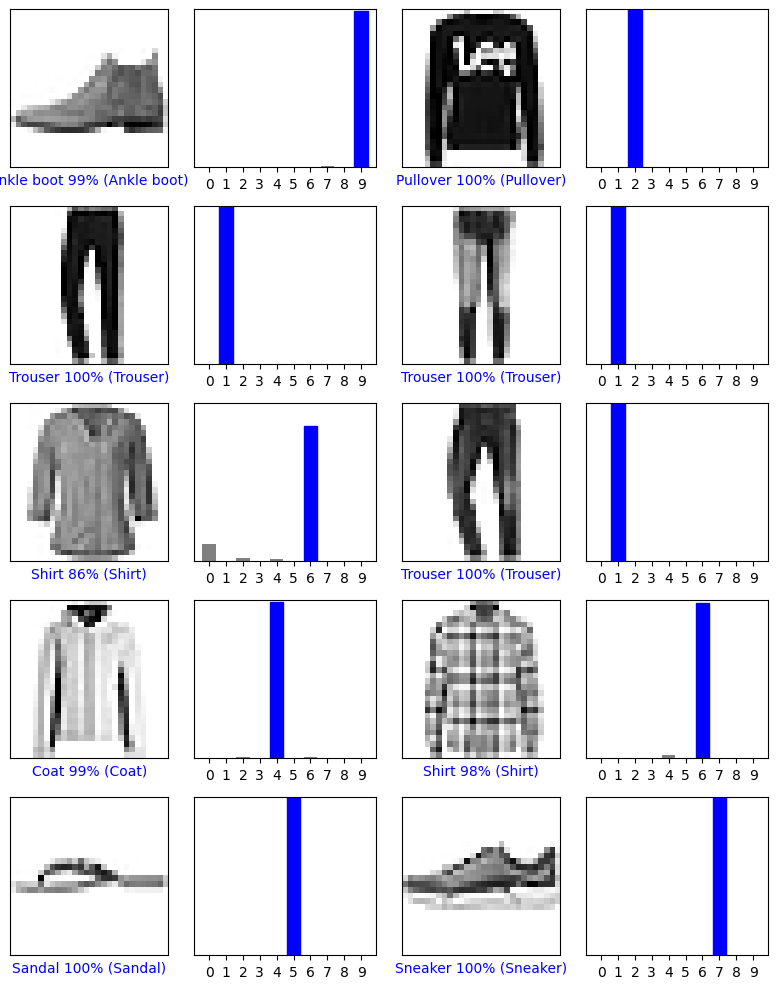

In [26]:
# Plot the first 10 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[0]

In [29]:
# Add the image to a batch where it's the only member. This is done because tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list
#hint: use np.expand_dims
img = (np.expand_dims(img,0))

print(img.shape)

(1, 1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 122ms/step
[[2.9169830e-06 7.3764511e-08 1.4019520e-08 6.2141545e-08 4.2245691e-09
  8.5662730e-04 1.5545294e-05 1.0212978e-02 9.5092109e-06 9.8890215e-01]]


In [31]:
#print the predicted class for the image
class_names[np.argmax(predictions_single[0])]

'Ankle boot'